## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [45]:
import pandas as pd


# Creating data frame for training data.

with open('./UCI HAR Dataset/features.txt') as file1:
    lines1 = file1.readlines()

with open('./UCI HAR Dataset/train/X_train.txt', 'r') as file2:
    lines2 = file2.readlines()

with open('./UCI HAR Dataset/train/y_train.txt', 'r') as file3:
    lines3 = file3.readlines()
    
with open('./UCI HAR Dataset/train/subject_train.txt', 'r') as file4:
    lines4 = file4.readlines()
    
feature_labels = [line.strip().split()[1] for line in lines1]

x_train_feature_values = [line.strip().split() for line in lines2]

y_train = [line.strip().split() for line in lines3]

subject_train = [line.strip().split() for line in lines4]

df_features_train = pd.DataFrame(x_train_feature_values, columns=feature_labels).astype('float64')
df_subject_train = pd.DataFrame(subject_train, columns=['subject']).astype('int32')
df_activity_train = pd.DataFrame(y_train, columns=['activity']).astype('int32')

df_train = pd.concat([df_features_train, df_subject_train, df_activity_train], axis=1)


# Creating data frame for test data.

with open('./UCI HAR Dataset/test/X_test.txt', 'r') as file5:
    lines5 = file5.readlines()

with open('./UCI HAR Dataset/test/y_test.txt', 'r') as file6:
    lines6 = file6.readlines()
    
with open('./UCI HAR Dataset/test/subject_test.txt', 'r') as file7:
    lines7 = file7.readlines()

x_test_feature_values = [line.strip().split() for line in lines5]

y_test = [line.strip().split() for line in lines6]

subject_test = [line.strip().split() for line in lines7]

df_features_test = pd.DataFrame(x_test_feature_values, columns=feature_labels).astype('float64')
df_subject_test = pd.DataFrame(subject_test, columns=['subject']).astype('int32')
df_activity_test = pd.DataFrame(y_test, columns=['activity']).astype('int32')

df_test = pd.concat([df_features_test, df_subject_test, df_activity_test], axis=1)

In [46]:
df_train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,5
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,5
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,5
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,5


In [47]:
df_test.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065,2,5
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706,2,5
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491,2,5
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,-0.741435,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263,2,5


In [48]:
# Define a dictionary to map numerical labels to activity names
activity_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Replace numerical labels with activity names in the DataFrame
df_train['activity'] = df_train['activity'].map(activity_mapping)
df_test['activity'] = df_test['activity'].map(activity_mapping)

In [49]:
from sklearn.model_selection import train_test_split

X_train = df_train.drop(columns=['activity'])  # Features
y_train = df_train['activity']  # Target

X_test = df_test.drop(columns=['activity'])  # Features
y_test = df_test['activity']  # Target

# Split data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [50]:
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier
sv_classifier = SVC()

# Train the classifier on the training data
sv_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = sv_classifier.predict(X_test)


### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [51]:
from sklearn.metrics import accuracy_score

# Accuracy on training set
y_train_pred = sv_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Accuracy on testing set
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9534092841353511
Testing Accuracy: 0.9243298269426535


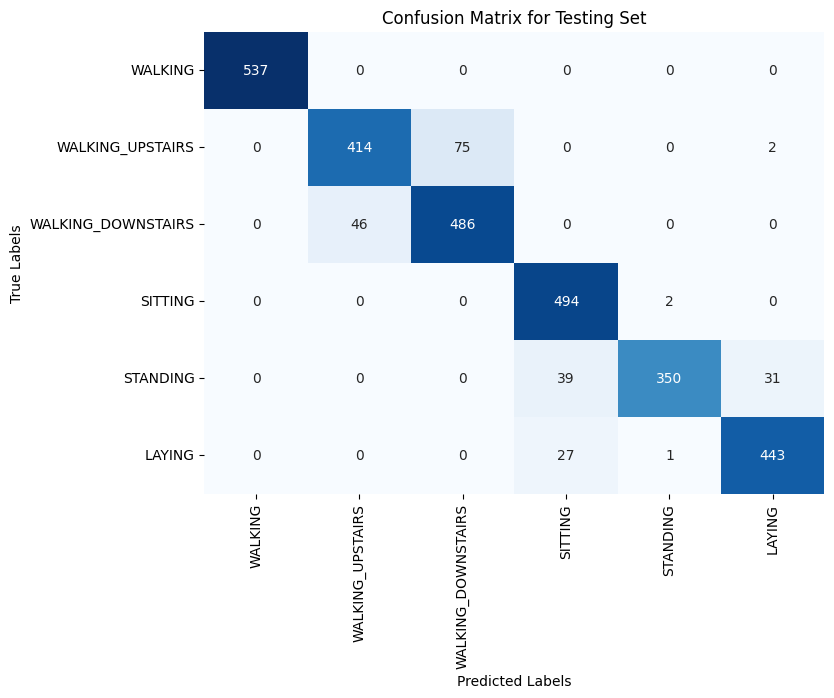

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Activity mapping
activity_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap with activity mapping
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[activity_mapping[i] for i in range(1, 7)],
            yticklabels=[activity_mapping[i] for i in range(1, 7)])
plt.title("Confusion Matrix for Testing Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



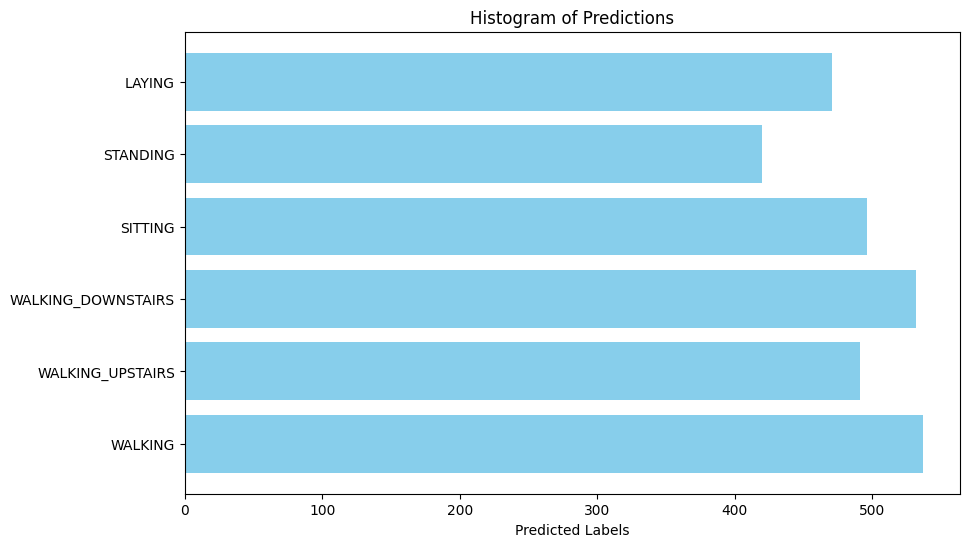

In [53]:
# Calculate the counts of predictions for each class
class_counts = np.sum(conf_matrix_test, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(class_counts)), class_counts, color='skyblue')
plt.xlabel('Predicted Labels')
plt.title('Histogram of Predictions') 
plt.yticks(np.arange(len(class_counts)), ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])
plt.show()